In [25]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [26]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


- Survived: Survival; 0= No, 1= Yes
- Pclass: Ticket class; 1=1st, 2=2nd, 3=3rd
- Sex: Female/Male
- Age: age in years
- SibSp: Number of siblings/spouses aboard the Titanic
- Parch: Number of parents/children aboard the Titanic
- Ticket: Ticket Number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation; C= Cherbourg, Q= Queenstown, S= Southampton

In [27]:
train_df.shape

(891, 12)

In [28]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [31]:
train_df.duplicated().sum()

0

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# To represent the missing values in percentage to have a clearer picture of the missing data
for column in train_df.columns:
    percent = train_df[column].isnull().mean()
    print(f'{column}:{round(percent*100, 2)}%')

PassengerId:0.0%
Survived:0.0%
Pclass:0.0%
Name:0.0%
Sex:0.0%
Age:19.87%
SibSp:0.0%
Parch:0.0%
Ticket:0.0%
Fare:0.0%
Cabin:77.1%
Embarked:0.22%


In [34]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

train_df.drop('Cabin', axis= 1, inplace=True) #dropping the column with the higher null values

train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data Exploration

In [35]:
train_df["Survived"].replace({0:"Not-Survived",1:"Survived"},inplace=True)
Pie = train_df["Survived"].value_counts().to_frame()
Pie


,Survived
Not-Survived,549
Survived,342


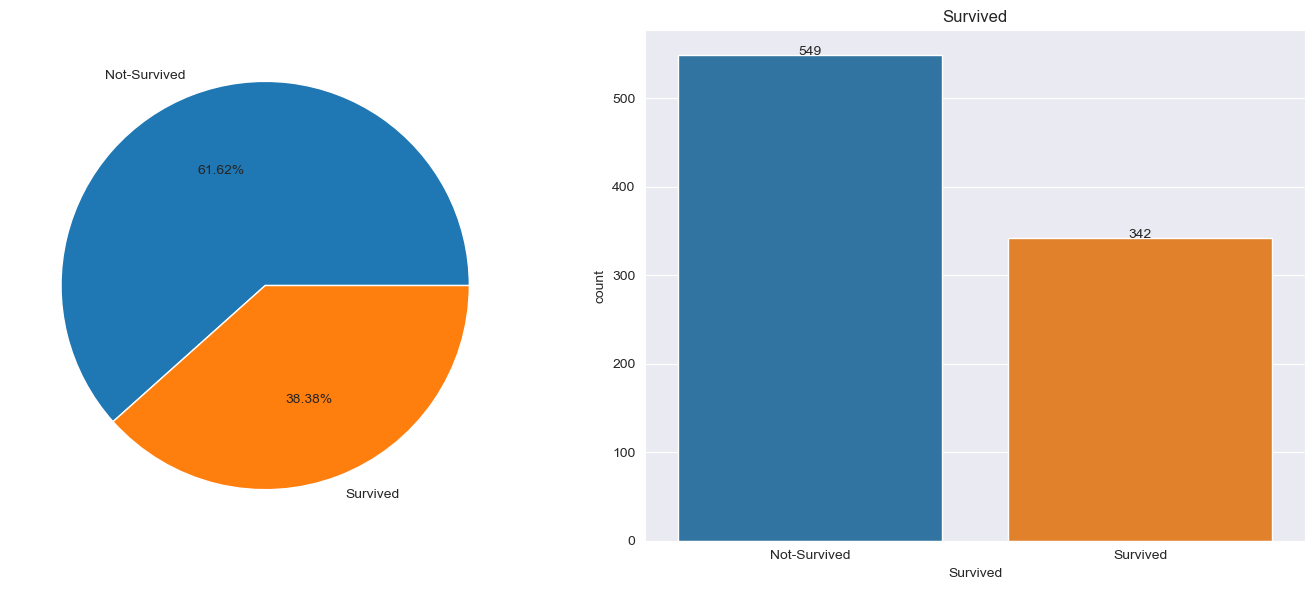

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")

plt.subplot(1,2,2)
sns.countplot(x="Survived",data=train_df)
plt.title("Survived")
for i,j in enumerate(Pie["Survived"]):
    plt.text(i,j,j,ha="center")
plt.tight_layout()
plt.show()

- Passengers who died are almost twice passengers who survived.

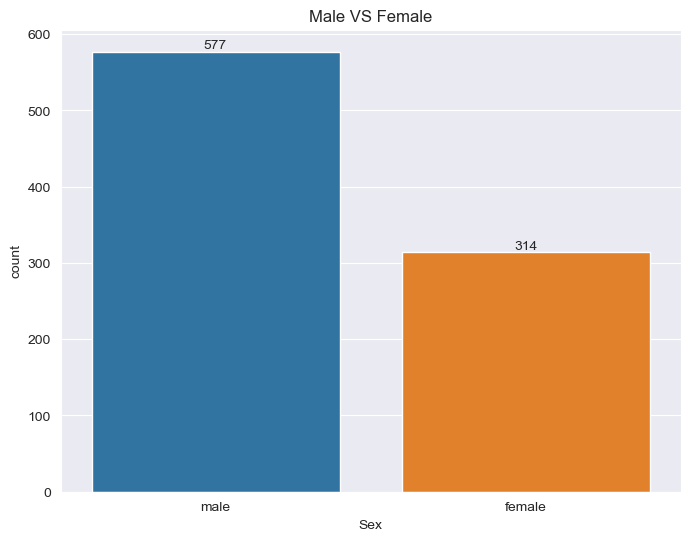

In [37]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=train_df['Sex'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Male VS Female")
plt.show()

- Male passengers are almost twice the the number of female passengers

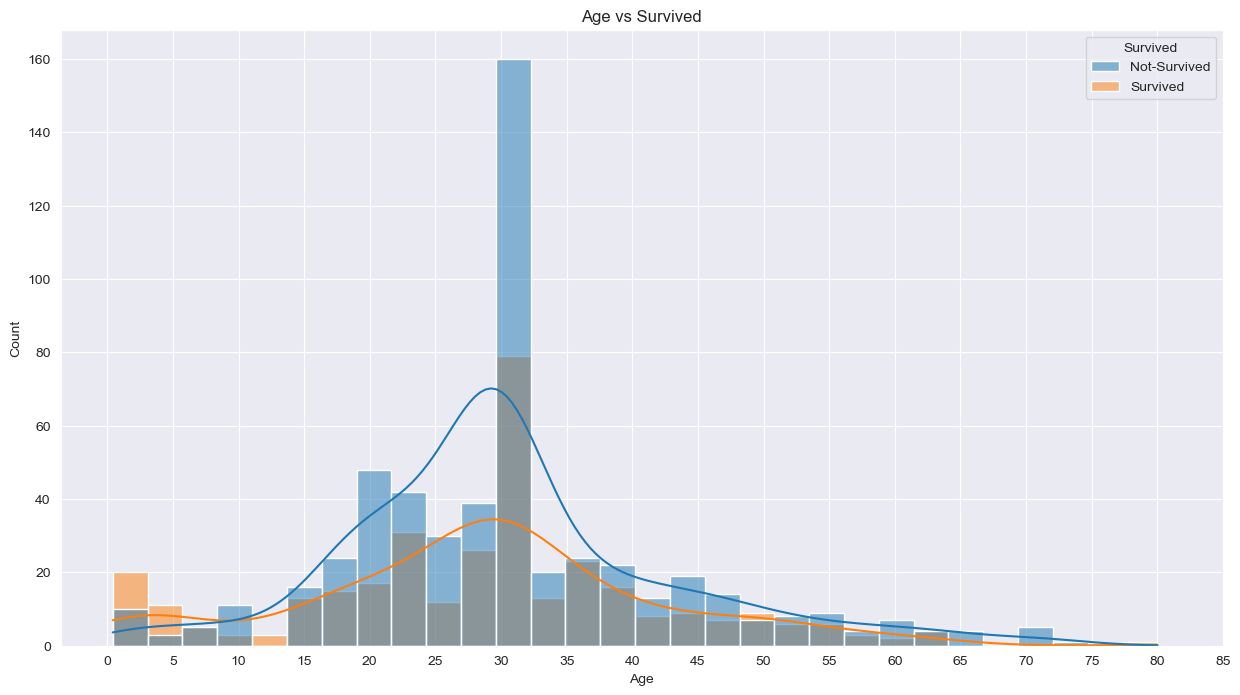

In [38]:
# plt.figure(figsize=(8,6))
# sns.distplot(train_df['Age'],kde=True,bins=30)
# plt.title("Age ditribution")
# plt.show()

plt.figure(figsize=(15,8))
sns.histplot(x="Age", hue="Survived", data=train_df, kde=True, color = 'muted')
plt.title("Age vs Survived")
plt.xticks(list(range(0,90,5)))
plt.show()

- We can say that most of the passengers were between ages 20-40 years

#### Target Variable = Survived

In [39]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

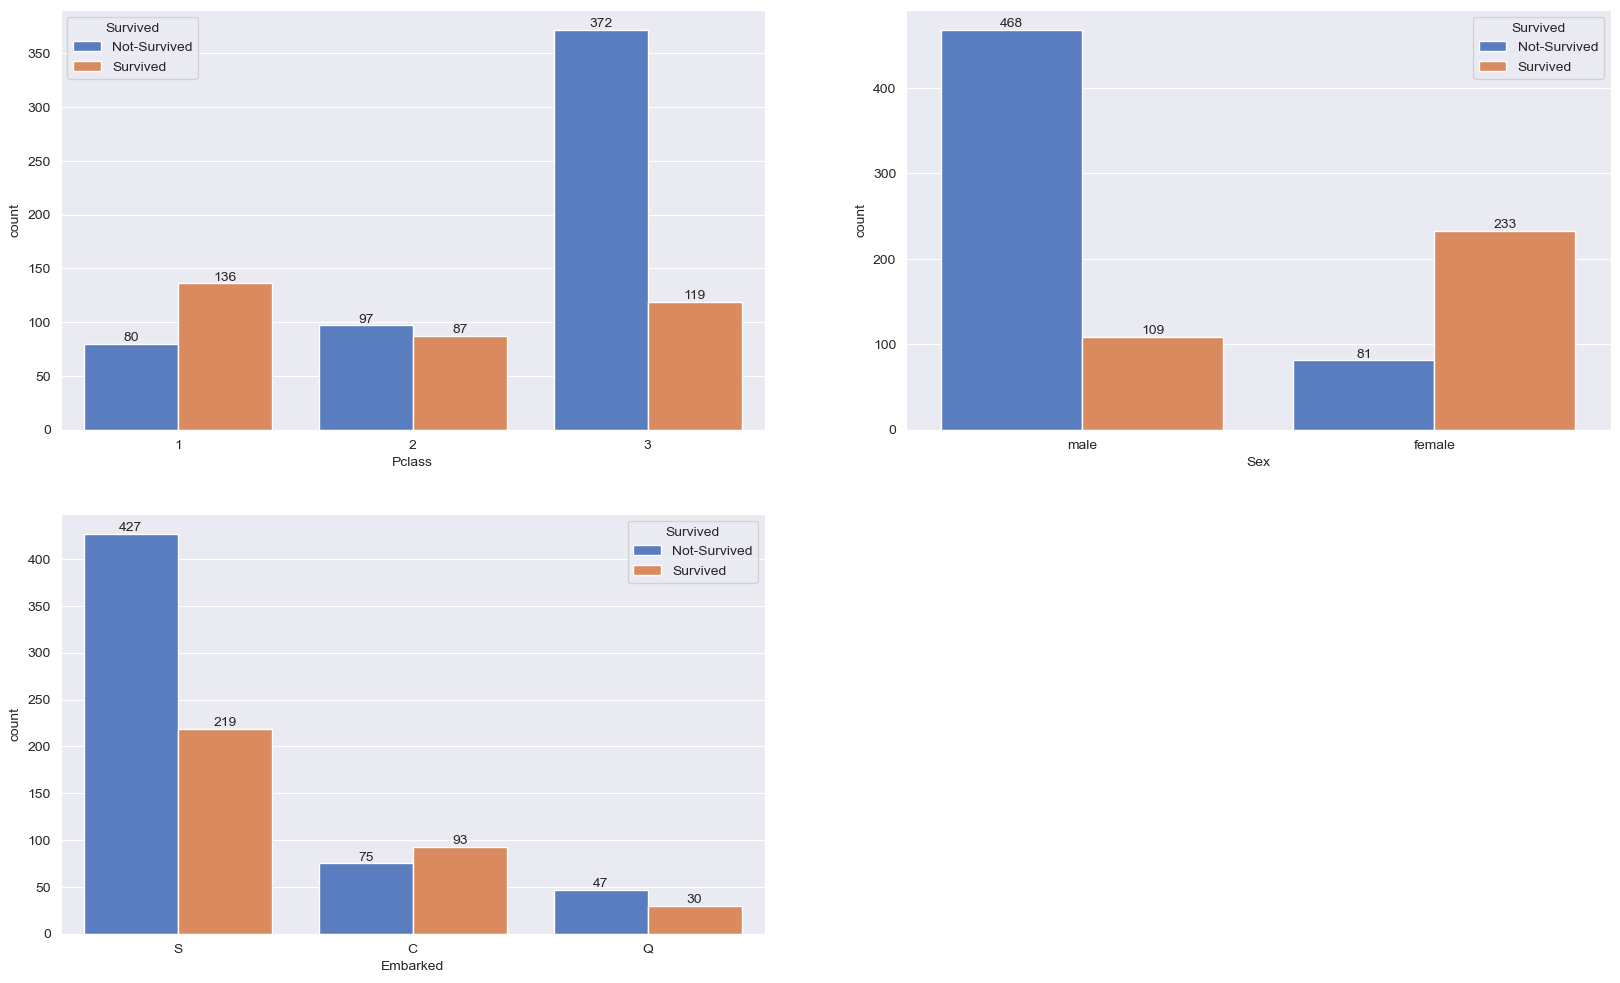

In [40]:
fig = plt.figure(figsize=(20,12))
fig.tight_layout()


for i in range(len(categorical_features)):
  col = categorical_features[i]
  sub = fig.add_subplot(2, 2, i + 1)
  ax = sns.countplot(data=train_df, x=col, hue='Survived', palette='muted')
  for container in ax.containers:
    ax.bar_label(container)
plt.show()
  

- Most of the passengers with 3rd class tickets did not survive
- Most of the passengers who survived had 1st class tickets
- Very few of the male passengers survived when compared to the female passengers of which more than 50% of female passengers survived.
- Most of the passengers who died embarked at Southampton, as well as the amount of passengers who survived.

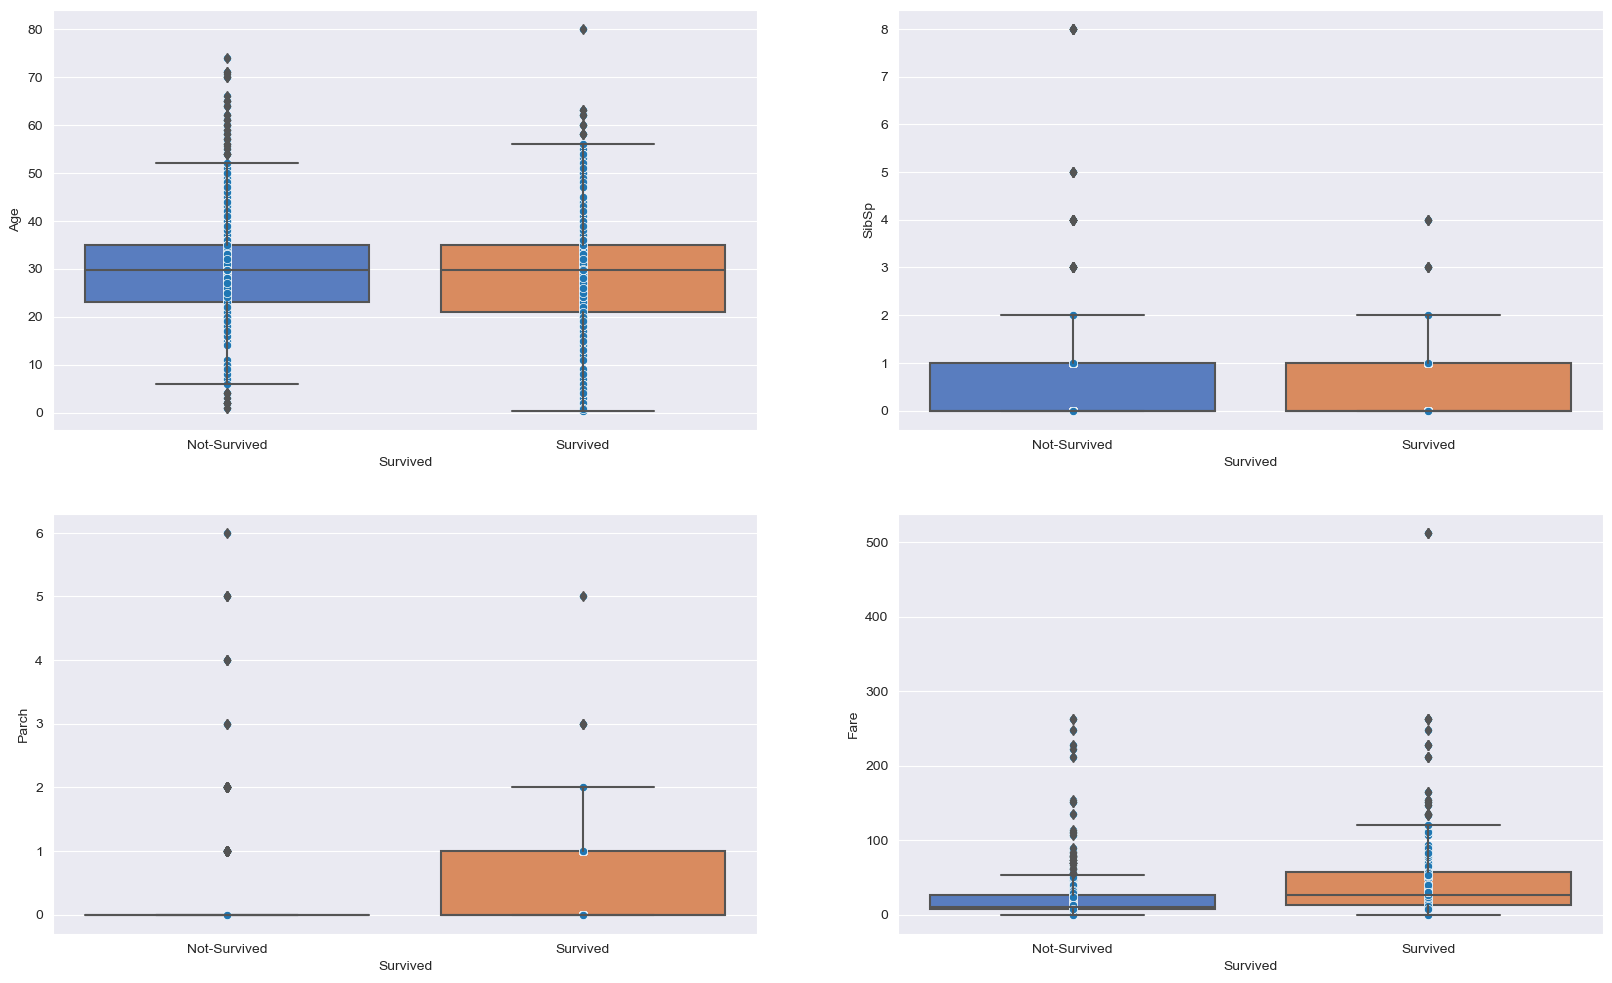

In [41]:
fig = plt.figure(figsize = (20,12))
fig.tight_layout()

for i in range(len(numeric_features)):
  column = numeric_features[i]
  sub = fig.add_subplot(2, 2, i + 1)
  sns.boxplot(x = 'Survived', y = column, data =train_df, palette = 'muted')
  sns.scatterplot(x = 'Survived', y = column, data = train_df, palette = 'muted')
plt.show()

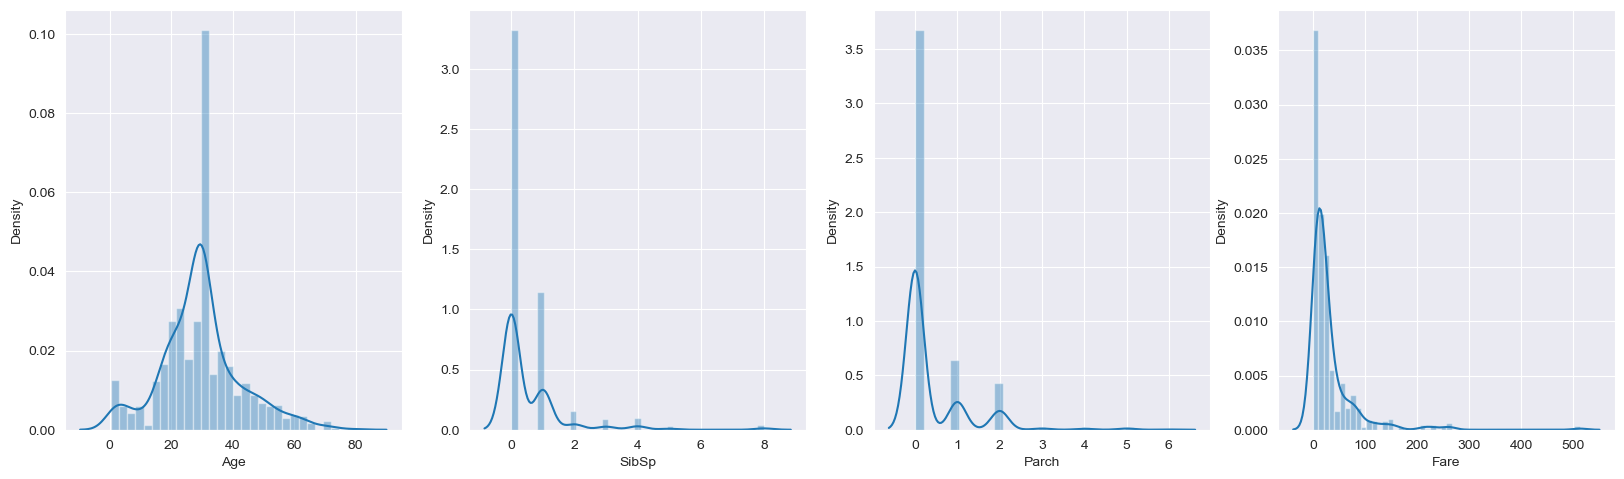

In [42]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.distplot(train_df["Age"])

plt.subplot(2,4,2)
sns.distplot(train_df["SibSp"])

plt.subplot(2,4,3)
sns.distplot(train_df["Parch"])

plt.subplot(2,4,4)
sns.distplot(train_df["Fare"])

fig.tight_layout()
plt.show()

- We can see that the numeric data are mostly skewed to the right (positively skewed). Now we need to transform the data to reduce skeweness.